In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tqdm

sys.path.append('..')
from anomalies.mixture import *
from anomalies.increasing import *
from anomalies.invariant import *
from anomalies.decreasing import *
sys.path.append('../datasets')
from data_utils import load_data_test

import matplotlib.pyplot as plt

In [2]:
# load data
# n = 256
# SNRdB = 40
# instance = 6765
# path_test = os.path.join('..', '..', '..', 'ecg-data', f'ecgSyn_n={n}_scaled_test_snr={SNRdB}dB.pkl')
# # process data
# Xok = pd.read_pickle(path_test).dropna(axis=0)
# nch = 1
# ninst = 10_000
# Xok = Xok.values[:ninst, 0:n].reshape((ninst, -1))
# # build a dataset
# load data
data_type = 'bridge'
if data_type == 'ecg':
    channels = ['z']
    n = 256
    SNRdB = 40
elif data_type == 'bridge':
    channels = ['x']
    n = 100
    SNRdB = None
elif data_type == 'satellite':
    channels = 'RW3_motcurr'
    n = 150
    SNRdB = None
instance = 6765
Xok = load_data_test(channels, n, data_type)[..., -1]

1.4998500000000032
1.4998506621545145
1.4998636280569455
1.4998506621545136
1.49985


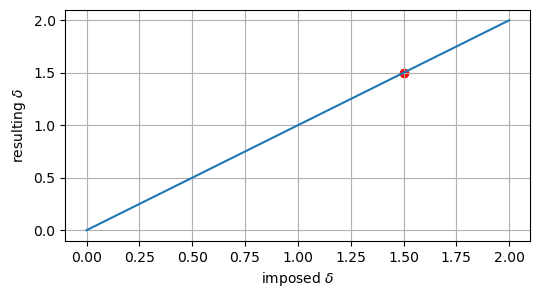

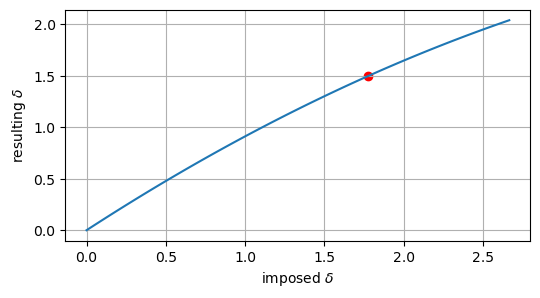

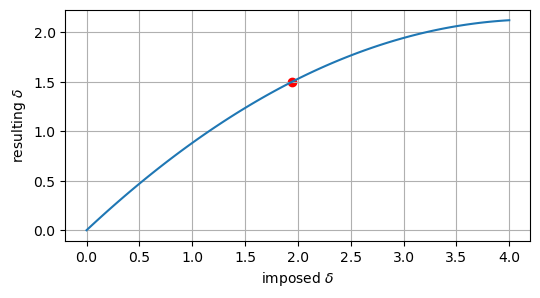

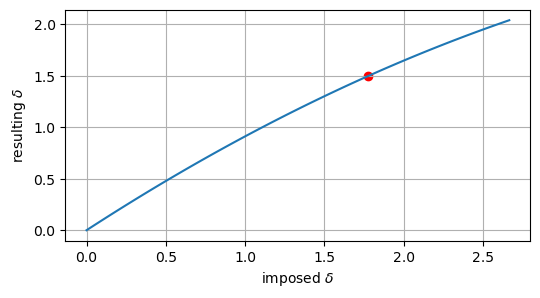

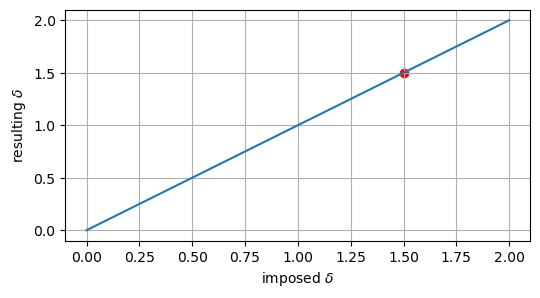

In [3]:
deviation = 1.5

# X_spectrum = SpectralAlteration(deviation).fit(Xok, SNRdB).distort(Xok)
# print(np.mean(np.sum((Xok - X_spectrum)**2, axis=-1))/n)
# X_basis = PrincipalSubspaceAlteration(deviation).fit(Xok).distort(Xok)
# print(np.mean(np.sum((Xok - X_basis)**2, axis=-1))/n)

mixture_dict = {
    'SpectralAlteration': 0,
    'PrincipalSubspaceAlteration':1
}

X_basis = mix(mixture_dict, deviation, Xok)
print(np.mean(np.sum((Xok - X_basis)**2, axis=-1))/n)

mixture_dict_0 = {
    'SpectralAlteration': 0.25,
    'PrincipalSubspaceAlteration':0.75
}
X_mix0 = mix(mixture_dict_0, deviation, Xok, SNRdB)
print(np.mean(np.sum((Xok - X_mix0)**2, axis=-1))/n)

mixture_dict_1 = {
    'SpectralAlteration': 0.5,
    'PrincipalSubspaceAlteration':0.5
}
X_mix1 = mix(mixture_dict_1, deviation, Xok, SNRdB)
print(np.mean(np.sum((Xok - X_mix1)**2, axis=-1))/n)

mixture_dict_2 = {
    'SpectralAlteration': 0.75,
    'PrincipalSubspaceAlteration':0.25
}

X_mix2 = mix(mixture_dict_2, deviation, Xok, SNRdB)
print(np.mean(np.sum((Xok - X_mix2)**2, axis=-1))/n)

mixture_dict_3 = {
    'SpectralAlteration': 1,
    'PrincipalSubspaceAlteration':0
}

X_spectrum = mix(mixture_dict_3, deviation, Xok, SNRdB)
print(np.mean(np.sum((Xok - X_spectrum)**2, axis=-1))/n)

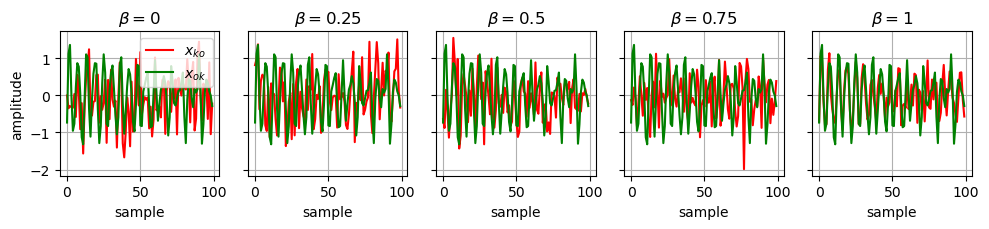

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2.4), sharex=True, sharey=True)

ax[0].plot(X_basis[instance], c='r', label='$x_{ko}$')
ax[0].plot(Xok[instance], c='g', label='$x_{ok}$')
ax[0].set(title='$\\beta=0$', ylabel='amplitude')
ax[0].legend(loc='upper right')

ax[1].plot(X_mix0[instance], c='r', label='$x_{ko}$')
ax[1].plot(Xok[instance], c='g', label='$x_{ok}$')
ax[1].set(title='$\\beta=0.25$')

ax[2].plot(X_mix1[instance], c='r', label='$x_{ko}$')
ax[2].plot(Xok[instance], c='g', label='$x_{ok}$')
ax[2].set(title='$\\beta=0.5$')

ax[3].plot(X_mix2[instance], c='r', label='$x_{ko}$')
ax[3].plot(Xok[instance], c='g', label='$x_{ok}$')
ax[3].set(title='$\\beta=0.75$')

ax[4].plot(X_spectrum[instance], c='r', label='$x_{ko}$')
ax[4].plot(Xok[instance], c='g', label='$x_{ok}$')
ax[4].set(title='$\\beta=1$')

for ax_ in ax:
    ax_.set(xlabel='sample')
    ax_.grid('on')
fig.tight_layout()